# Raw code for Practice 1 (Lagrange interpolation)

This notebook is for practicing the method and testing the features of Python and Sympy that will help develop a better final version of the code.

In [1]:
import numpy as np
from sympy import init_session
init_session(use_latex=True)
%matplotlib inline

IPython console for SymPy 1.9 (Python 3.9.7-64-bit) (ground types: python)

These commands were executed:
>>> from __future__ import division
>>> from sympy import *
>>> x, y, z, t = symbols('x y z t')
>>> k, m, n = symbols('k m n', integer=True)
>>> f, g, h = symbols('f g h', cls=Function)
>>> init_printing()

Documentation can be found at https://docs.sympy.org/1.9/



In [2]:
# Experimental data to be interpolated
X = [0,2,3,10,12]
Y = [-1,1,2,3,4]
n = len(X)
n

C:\Users\Indatech\anaconda3\lib\site-packages\IPython\lib\latextools.py:126: MatplotlibDeprecationWarning: 
The to_png function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use mathtext.math_to_image instead.
  mt.to_png(f, s, fontsize=12, dpi=dpi, color=color)
C:\Users\Indatech\anaconda3\lib\site-packages\IPython\lib\latextools.py:126: MatplotlibDeprecationWarning: 
The to_rgba function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use mathtext.math_to_image instead.
  mt.to_png(f, s, fontsize=12, dpi=dpi, color=color)
C:\Users\Indatech\anaconda3\lib\site-packages\IPython\lib\latextools.py:126: MatplotlibDeprecationWarning: 
The to_mask function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use mathtext.math_to_image instead.
  mt.to_png(f, s, fontsize=12, dpi=dpi, color=color)
C:\Users\Indatech\anaconda3\lib\site-packages\IPython\lib\latextools.py:126: MatplotlibDeprecationWarning: 
Th

Let's start by doing the divided differences one by one

In [3]:
V0 = Matrix(X)
V1 = Matrix(Y)
V1

⎡-1⎤
⎢  ⎥
⎢1 ⎥
⎢  ⎥
⎢2 ⎥
⎢  ⎥
⎢3 ⎥
⎢  ⎥
⎣4 ⎦

In [4]:
M = V0.row_join(V1)
M

⎡0   -1⎤
⎢      ⎥
⎢2   1 ⎥
⎢      ⎥
⎢3   2 ⎥
⎢      ⎥
⎢10  3 ⎥
⎢      ⎥
⎣12  4 ⎦

In [5]:
V2 = zeros(n,1)
print(range(n))
V2

range(0, 5)


⎡0⎤
⎢ ⎥
⎢0⎥
⎢ ⎥
⎢0⎥
⎢ ⎥
⎢0⎥
⎢ ⎥
⎣0⎦

#### 1st order divided differences 

In [6]:
V2 = zeros(n,1)
V2[0] = (V1[0+1]-V1[0])/(X[0+1]-X[0])
V2[1] = (V1[1+1]-V1[1])/(X[1+1]-X[1])
V2[2] = (V1[2+1]-V1[2])/(X[2+1]-X[2])
V2[3] = (V1[3+1]-V1[3])/(X[3+1]-X[3])
V2

⎡ 1 ⎤
⎢   ⎥
⎢ 1 ⎥
⎢   ⎥
⎢1/7⎥
⎢   ⎥
⎢1/2⎥
⎢   ⎥
⎣ 0 ⎦

In [7]:
# Ahora en bucle
for i in range(n-1):
 V2[i] = (V1[i+1]-V1[i])/(X[i+1]-X[i]);

M = M.row_join(V2)
M

⎡0   -1   1 ⎤
⎢           ⎥
⎢2   1    1 ⎥
⎢           ⎥
⎢3   2   1/7⎥
⎢           ⎥
⎢10  3   1/2⎥
⎢           ⎥
⎣12  4    0 ⎦

#### 2nd order divided differences 

In [8]:
V3 = zeros(n,1)
V3[0] = (V2[0+1]-V2[0])/(X[0+2]-X[0])
V3[1] = (V2[1+1]-V2[1])/(X[1+2]-X[1])
V3[2] = (V2[2+1]-V2[2])/(X[2+2]-X[2])
V3

⎡  0  ⎤
⎢     ⎥
⎢-3/28⎥
⎢     ⎥
⎢5/126⎥
⎢     ⎥
⎢  0  ⎥
⎢     ⎥
⎣  0  ⎦

In [9]:
for i in range(n-2):
 V3[i] = (V2[i+1]-V2[i])/(X[i+2]-X[i]);

M = M.row_join(V3)
M

⎡0   -1   1     0  ⎤
⎢                  ⎥
⎢2   1    1   -3/28⎥
⎢                  ⎥
⎢3   2   1/7  5/126⎥
⎢                  ⎥
⎢10  3   1/2    0  ⎥
⎢                  ⎥
⎣12  4    0     0  ⎦

#### 3rd order divided differences 

In [10]:
V4 = zeros(n,1)
V4[0] = (V3[0+1]-V3[0])/(X[0+3]-X[0])
V4[1] = (V3[1+1]-V3[1])/(X[1+3]-X[1])
V4

⎡-3/280⎤
⎢      ⎥
⎢  37  ⎥
⎢ ──── ⎥
⎢ 2520 ⎥
⎢      ⎥
⎢  0   ⎥
⎢      ⎥
⎢  0   ⎥
⎢      ⎥
⎣  0   ⎦

In [11]:
for i in range(n-3):
 V4[i] = (V3[i+1]-V3[i])/(X[i+3]-X[i]);

M = M.row_join(V4)
M

⎡0   -1   1     0    -3/280⎤
⎢                          ⎥
⎢                      37  ⎥
⎢2   1    1   -3/28   ──── ⎥
⎢                     2520 ⎥
⎢                          ⎥
⎢3   2   1/7  5/126    0   ⎥
⎢                          ⎥
⎢10  3   1/2    0      0   ⎥
⎢                          ⎥
⎣12  4    0     0      0   ⎦

#### 4th order divided differences 

In [12]:
V5 = zeros(n,1)
V5[0] = (V4[0+1]-V4[0])/(X[0+4]-X[0])
V5

⎡2/945⎤
⎢     ⎥
⎢  0  ⎥
⎢     ⎥
⎢  0  ⎥
⎢     ⎥
⎢  0  ⎥
⎢     ⎥
⎣  0  ⎦

In [13]:
for i in range(n-4):
 V5[i] = (V4[i+1]-V4[i])/(X[i+4]-X[i]);

M = M.row_join(V5)
M

⎡0   -1   1     0    -3/280  2/945⎤
⎢                                 ⎥
⎢                      37         ⎥
⎢2   1    1   -3/28   ────     0  ⎥
⎢                     2520        ⎥
⎢                                 ⎥
⎢3   2   1/7  5/126    0       0  ⎥
⎢                                 ⎥
⎢10  3   1/2    0      0       0  ⎥
⎢                                 ⎥
⎣12  4    0     0      0       0  ⎦

### Divides differences matrix with nested Loop

In [14]:
V0 = Matrix(X)
V1 = Matrix(Y)
M = zeros(n, n+1)
M[:,0] = V0
M[:,1] = V1
M

⎡0   -1  0  0  0  0⎤
⎢                  ⎥
⎢2   1   0  0  0  0⎥
⎢                  ⎥
⎢3   2   0  0  0  0⎥
⎢                  ⎥
⎢10  3   0  0  0  0⎥
⎢                  ⎥
⎣12  4   0  0  0  0⎦

In [15]:
M[2,1]

In [16]:
for k in range(2,n+1):
    for i in range(n-(k-1)):
        print(i,k)
        M[i,k] = (M[i+1,k-1]-M[i,k-1])/(X[i+(k-1)]-X[i]);

M

0 2
1 2
2 2
3 2
0 3
1 3
2 3
0 4
1 4
0 5


⎡0   -1   1     0    -3/280  2/945⎤
⎢                                 ⎥
⎢                      37         ⎥
⎢2   1    1   -3/28   ────     0  ⎥
⎢                     2520        ⎥
⎢                                 ⎥
⎢3   2   1/7  5/126    0       0  ⎥
⎢                                 ⎥
⎢10  3   1/2    0      0       0  ⎥
⎢                                 ⎥
⎣12  4    0     0      0       0  ⎦

In [17]:
for i in range(2,n+1):
    print(i)


2
3
4
5


### Collecting the coefficients for forward and backward polynomial

In [18]:
# For forward polynomial
A = zeros(n,1)
B = zeros(n,1)
A

⎡0⎤
⎢ ⎥
⎢0⎥
⎢ ⎥
⎢0⎥
⎢ ⎥
⎢0⎥
⎢ ⎥
⎣0⎦

In [19]:
for i in range(n):
    A[i] = M[0,i+1] 

A

⎡  -1  ⎤
⎢      ⎥
⎢  1   ⎥
⎢      ⎥
⎢  0   ⎥
⎢      ⎥
⎢-3/280⎥
⎢      ⎥
⎣2/945 ⎦

In [20]:
for i in range(n):
    B[i] = M[n-1-i,i+1] 

B

⎡  4  ⎤
⎢     ⎥
⎢ 1/2 ⎥
⎢     ⎥
⎢5/126⎥
⎢     ⎥
⎢ 37  ⎥
⎢──── ⎥
⎢2520 ⎥
⎢     ⎥
⎣2/945⎦

### Creation of Newton's interpolating polynomial

In [21]:
X

In [22]:
Y

In [23]:
A

⎡  -1  ⎤
⎢      ⎥
⎢  1   ⎥
⎢      ⎥
⎢  0   ⎥
⎢      ⎥
⎢-3/280⎥
⎢      ⎥
⎣2/945 ⎦

By "hand"

In [34]:
# progressive
P = A[0] + A[1]*S(x-X[0]) + A[2]*S(x-X[0])*S(x-X[1]) + A[3]*(x-X[0])*(x-X[1])*(x-X[2]) \
    + A[4]*(x-X[0])*(x-X[1])*(x-X[2])*(x-X[3])

P

In [35]:
simplify(P)

In [38]:
n = len(X)
Pol = A[0]

for i in range(1,n):
    mult = 1
    for j in range(i):
        mult *= (x-X[j])
    sum = A[i]*mult
    Pol += sum

Pol

In [39]:
simplify(Pol)

In [40]:
# Substituting for an entered value of x
xx = 1

interp = Pol.subs(x,S(xx))
interp

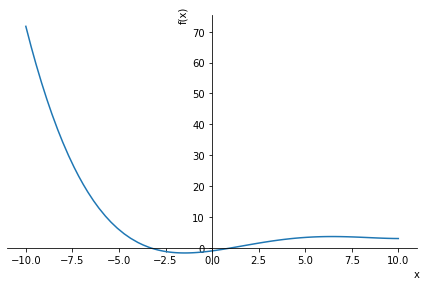

In [41]:
# Graphics
p1 = plot(Pol, show=True)